Ensemble method to minimize errors.

Two Types:

Homogeneous Algorithm - Baging, Boosting

Heterogeneous Algorithm - Stacking

Bagging : Minimize Variance, Regression, Classification, handles Overfitting (Random Forest)

#### Random Forest : One kind of ensemble algorithm

Random Forest (RF) :

.To predict a company A stock will go up or down....

#### Random Forest : Job getting chance : Regression Problem

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Job_Exp.csv')
X = dataset.iloc[:, [0]].values
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [3]:
#Ensemble
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor(n_estimators = 200, random_state = 2)
rf_r.fit(X_train, y_train)

y_pred_test = rf_r.predict(X_test)

print(rf_r.score(X_test, y_test))

print(y_pred_test)

0.9972017693312184
[ 4.795   2.57    4.795  88.065  51.5815]


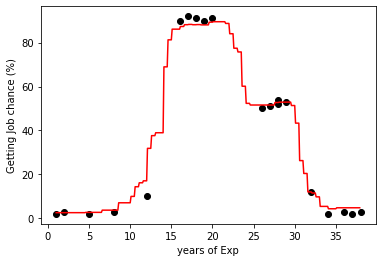

In [4]:
#Graph 
X_dt = np.arange(min(X), max(X), 0.1)
X_dt = X_dt.reshape(len(X_dt), 1)
plt.scatter(X, y, color = 'black')
plt.plot(X_dt, rf_r.predict(X_dt), color = 'red' )
plt.ylabel('Getting Job chance (%)')
plt.xlabel('years of Exp')
plt.show()

#### Random Forest Classification

In [6]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier(n_estimators = 200, random_state = 2)
rf_c.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_test = rf_c.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(test_acc)

0.9446064139941691


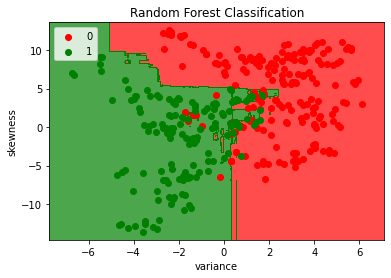

In [7]:
from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = rf_c
h = 0.01
X_plot, z_plot = X_test, y_test

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['red', 'green'][i], cmap = ListedColormap(('red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Random Forest Classification')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

plt.show()

#### Boosting Training :

.Traning is Sequential

.Prediction is parallel

.Aim is to minimize Bias

.Higher vote to misclassified samples

.Tend to overfit

Eg. Adaboost, Gradient Boost, xGBoost

#### Gradient Decent Regression

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Job_Exp.csv')
X = dataset.iloc[:, [0]].values
y = dataset.iloc[:, 1].values

0.9998557501812869
0.9994413647495826


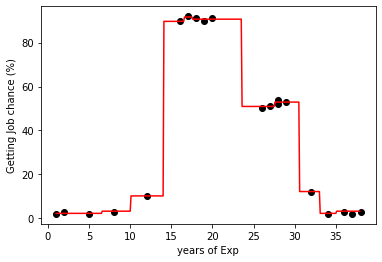

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


from sklearn.ensemble import GradientBoostingRegressor

gb_r = GradientBoostingRegressor(n_estimators = 500, max_depth = 6, learning_rate = 0.01)
gb_r.fit(X_train, y_train)

print(gb_r.score(X_train, y_train))

print(gb_r.score(X_test, y_test))

#Graph 
X_dt = np.arange(min(X), max(X), 0.1)
X_dt = X_dt.reshape(len(X_dt), 1)
plt.scatter(X, y, color = 'black')
plt.plot(X_dt, gb_r.predict(X_dt), color = 'red' )
plt.ylabel('Getting Job chance (%)')
plt.xlabel('years of Exp')
plt.show()

#### Gradient Boosting Classification

In [12]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
#Ensemble
from sklearn.ensemble import GradientBoostingClassifier
gb_c = GradientBoostingClassifier(n_estimators = 200, random_state = 2, max_depth = 6, learning_rate = 0.01)
gb_c.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_test = gb_c.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print(test_acc)

0.9329446064139941


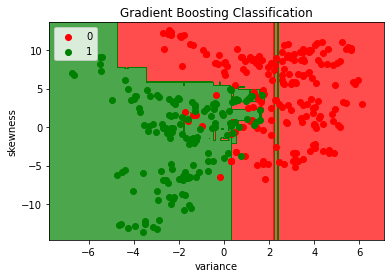

In [14]:
from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = gb_c
h = 0.01
X_plot, z_plot = X_test, y_test

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['red', 'green'][i], cmap = ListedColormap(('red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Gradient Boosting Classification')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

plt.show()